<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S7/S7_AssignmentSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision

In [2]:
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize(0.5, 0.5, 0.5)])

# Load Train & Test Dataset

train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True, num_workers=4)

test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=False, num_workers=4)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


**Show some Images**

 ship   car   car   cat


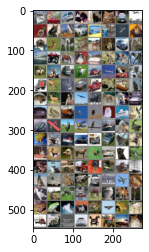

In [3]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize this is make sure the image is visible, if this step is skipped then the resulting images have a dark portion
    npimg = img.numpy()   # converting image to numpy array format
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    # transposing npimg array


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# import torch.nn as nn
# import torch.nn.functional as F


# # SETUP CODE(Normal Conv with BN & ReLU without Dilation & FCN)

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Sequential(nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (3,3), padding = 1, bias = False),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 32, RF = 3

#         self.conv2 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (3,3), padding = 1, bias = False),
#                                    nn.BatchNorm2d(32),
#                                    nn.ReLU())# O/P size = 32, RF = 5

#         self.pool = nn.MaxPool2d(2, 2) # )O/P size = 16, RF = 6

#         self.conv3 = nn.Sequential(nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size=(1,1), padding = 0, bias = False ),
#                                    nn.BatchNorm2d(64),
#                                    nn.ReLU()) # O/P size = 16, RF = 10

#         self.conv4 = nn.Sequential(nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size=(3,3), padding = 0, bias = False ),
#                                    nn.BatchNorm2d(64),
#                                    nn.ReLU()) # O/P size = 14, RF = 14
        

#         self.pool = nn.MaxPool2d(2,2) # O/P size = 7, RF = 15

#         self.conv5 = nn.Sequential(nn.Conv2d(in_channels = 64, out_channels = 16, kernel_size = (1,1), padding = 0, bias = False),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 7, RF = ?
                            
#         self.conv6 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size=(3,3), padding = 0, bias = False),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 5, RF = ?
        
#         self.gap = nn.Sequential(nn.AvgPool2d(5)) # O/P size = 1

#         self.conv7 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels= 10, kernel_size=(1,1), padding = 0, bias = False)) # O/P size = 1

#         self.drop = nn.Sequential(nn.Dropout(0.10))
      
#         # self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         # self.fc2 = nn.Linear(120, 84)
#         # self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.drop(x)
#         x = self.conv2(x)
#         x = self.drop(x)
#         x = self.pool(x)
#         x = self.conv3(x)
#         x = self.drop(x)
#         x = self.conv4(x)
#         x = self.drop(x)
#         x = self.pool(x)
#         x = self.conv5(x)
#         x = self.drop(x)
#         x = self.conv6(x)
#         x = self.gap(x)
#         x = self.conv7(x)

#         x = x.view(-1, 10)
#         return F.log_softmax(x, dim = -1)

#         # return x


# net = Net()

In [0]:
# import torch.nn as nn
# import torch.nn.functional as F


# # define depthwise convolution class
# class depthwise_conv(nn.Module):
#   def __init__(self, inp, out):
#     super(depthwise_conv, self).__init__()
#     self.depthwise = nn.Conv2d(inp, out, kernel_size= (3,3), padding = 1, groups = inp)
#     self.pointwise = nn.Conv2d(inp, out, kernel_size = (1,1))

#   def forward(self, x):
#     out = self.depthwise(x)
#     out = self.pointwise(out)
#     return out



# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Sequential(nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (3,3), padding = 1, bias = False),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 32, RF = 3

#         self.conv2 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (3,3), padding = 1, bias = False),
#                                    nn.BatchNorm2d(32),
#                                    nn.ReLU())# O/P size = 32, RF = 5

#         self.conv3 = nn.Sequential(nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3,3), padding = 1, dilation = 2,  bias = False),
#                                    nn.BatchNorm2d(64),
#                                    nn.ReLU())# O/P size = 32, RF = 9

#         self.conv4 = nn.Sequential(nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3,3), padding = 1, dilation = 2,  bias = False),
#                                    nn.BatchNorm2d(64),
#                                    nn.ReLU())# O/P size = 32, RF = 13               


#         self.pool = nn.MaxPool2d(2, 2) # )O/P size = 16, RF = 14


#         self.conv5 = nn.Sequential(nn.Conv2d(in_channels = 64, out_channels = 16, kernel_size=(1,1), padding = 1, bias = False ),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 16, RF = 14

#         self.conv6 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size=(3,3), padding = 1, groups = 16, bias = False )) # O/P size = 16, RF = 18

#         self.pointwise = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (1,1), bias = False),
#                                        nn.BatchNorm2d(32), 
#                                        nn.ReLU())

#         self.conv7 = nn.Sequential(nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size=(3,3), padding = 1, dilation = 2, bias = False ),
#                                    nn.BatchNorm2d(64),
#                                    nn.ReLU()) # O/P size = 16, RF = 26
        

#         self.pool = nn.MaxPool2d(2,2) # O/P size = 8, RF = 28


#         self.conv8 = nn.Sequential(nn.Conv2d(in_channels = 64, out_channels = 16, kernel_size = (1,1), padding = 0, bias = False),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 8, RF = 28
                            
#         self.conv9 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=(3,3), padding = 1, bias = False),
#                                    nn.BatchNorm2d(32),
#                                    nn.ReLU()) # O/P size = 8, RF = 36


#         self.pool = nn.MaxPool2d(2,2) # O/P size = 4, RF = 40

#         self.conv10 = nn.Sequential(nn.Conv2d(in_channels = 32, out_channels = 16, kernel_size=(1,1), padding = 0, bias = False),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 4, RF = 40


#         self.conv11 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size=(3,3), padding = 1, bias = False),
#                                    nn.BatchNorm2d(16),
#                                    nn.ReLU()) # O/P size = 4, RF = 56

        
#         self.gap = nn.Sequential(nn.AvgPool2d(3)) # O/P size = 1

#         self.conv12 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels= 10, kernel_size=(1,1), padding = 0, bias = False)) # O/P size = 1

#         self.drop = nn.Sequential(nn.Dropout(0.10))
      
#         # self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         # self.fc2 = nn.Linear(120, 84)
#         # self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.conv3(x)
#         x = self.conv4(x)
#         x = self.pool(x)
#         x = self.conv5(x)
#         x = self.conv6(x)
#         x = self.pointwise(x)
#         x = self.conv7(x)
#         x = self.pool(x)
#         x = self.conv8(x)
#         x = self.conv9(x)
#         x = self.pool(x)
#         x = self.conv10(x)
#         x = self.conv11(x)
#         x = self.gap(x)
#         x = self.conv12(x)

#         x = x.view(-1, 10)
#         return F.log_softmax(x, dim = -1)

#         # return x


# net = Net()

In [0]:
# from torchsummary import summary
# import torch
# import torch.nn
# # import torch.nn.Functional as F

# class Net(nn.Module):

# 	def __init__(self, model = 'DefaultModel'): # create a default model
# 		super(Net, self).__init__()
# 		self.Training = None
# 		self.model = model

# 	# Now define few helper functions like conv2d, depthwise convolution, summary etc
# 	def Conv2d(self, in_channels, out_channels, kernel_size = (3,3), padding=0, dilation=1, groups=1, bias=False):
		
# 		return [nn.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = kernel_size, padding = padding,
# 		 dilation = dilation, groups = groups, bias = bias)]


# 	def depthwise_conv2d(self, in_channels, out_channels, kernel_size = (3,3), padding=1, dilation=1, groups=1, bias = False):
		
# 		return [nn.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = kernel_size, padding = padding,
# 		 dilation = dilation, groups = in_channels, bias = bias), 
# 		nn.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = (1,1), bias = bias)]

# # method to add BatchNorm, Dropout & ReLU
# 	def bn_relu_drp(self, convlist, out_channels, bn = True, dropout_value = 0, relu = True):
# 		if bn:
# 			convlist.append(nn.BatchNorm2d(out_channels))
# 		if dropout_value > 0:
# 			convlist.append(nn.Dropout(dropout_value))
# 		if relu:
# 			convlist.append(nn.ReLU())

# 		return nn.Sequential(*convlist)	


# 	def create_conv2d(self, in_channels, out_channels, kernel_size = (3,3), padding=0, dilation=1, groups=1, bias=False):
# 		return self.bn_relu_drp(self.Conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = kernel_size, padding = padding, dilation = dilation, groups = groups, bias = bias), out_channels)#, bn, dropout, relu)

# # depthwise convolution
# 	def create_dwc(self, in_channels, out_channels, kernel_size = (3,3), padding=1, dilation=1, groups=1, bias = False):
# 		return self.bn_relu_drp(self.depthwise_conv2d(in_channels = in_channels, out_channels = out_channels, kernel_size = kernel_size, padding = padding, dilation = dilation, groups = in_channels, bias = bias), out_channels, bn, dropout, relu)

# 	def summary(self, input_size):
# 		summary(self, input_size = input_size)


# # add your different variant models here in the form of class
# class cifarNet(Net):
#     def __init__(self, name="Model", dropout_value=0):
#       super(cifarNet, self).__init__(name)

# 		# ConvBlock 1
#       self.conv1 = self.create_conv2d(3, 16, padding = 1) # 32
#       self.conv2 = self.create_conv2d(16, 32, padding = 1) # 32
#       self.conv3 = self.create_conv2d(32, 64, padding = 1, dilation = 2) # 30
#       self.conv4 = self.create_conv2d(64, 64, padding = 1, dilation = 2) # 28

# 		# Transition Block 1
#       self.pool1 = nn.MaxPool2d(2,2) # 14
#       self.conv5 = self.create_conv2d(64, 16, kernel_size = (1,1), padding = 1) # 16


# 		# Conv Block 2
#       self.conv6 = self.create_dwc(16, 32, dropout_value) # 14
#       self.conv7 = self.create_conv2d(32, 64, padding = 1, dilation = 2) #12


# 		# Transition Block 2
#       self.pool2 = nn.MaxPool2d(2,2)  # 6
#       self.conv8 = self.create_conv2d(64, 16, kernel_size = (1,1), padding = 1) # 6


# 		# Conv Block 3
#       self.conv9 = self.create_conv2d(16, 32, padding = 1) # 6


# 		# Transition Block 3
#       self.pool3 = nn.MaxPool2d(2,2) # 3
#       self.conv10 = self.create_conv2d(32, 16, kernel_size = (1,1)) # 3


# 		# Conv Block 4 
#       self.conv11 = self.create_conv2d(16, 16, padding = 1) # 3


# 		# GAP
#       self.gap = nn.AvgPool2d(kernel_size = (3,3)) # 1
#       self.conv12 = self.create_conv2d(16, 10, kernel_size = (1,1), padding = 0, bn = False, relu = False) # 1


#     def forward(self, x):
#       x = self.conv1(x)
#       x = self.conv2(x)
#       x = self.conv3(x)
#       x = self.conv4(x)

#       x = self.pool1(x)

#       x = self.conv5(x)
#       x = self.conv6(x)
#       x = self.conv7(x)

#       x = self.pool2(x)

#       x = self.conv8(x)
#       x = self.conv9(x)

#       x = self.pool3(x)
      
#       x = self.conv10(x)
#       x = self.conv11(x)

#       x = self.gap(x)

#       x = self.conv12(x)

#       x = x.view(-1, 10)
#       return F.log_softmax(x, dim = -1)


# model = cifarNet()
		

In [0]:
# from torchsummary import summary
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#     """
#     Main class with required helper functions for conv2d, depthwise 2d, model summary etc
#     """

#     def conv2d(self, in_channels, out_channels, kernel_size=(3,3), dilation=1, groups=1, padding=1, bias=False):
#       return [nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, groups=groups, dilation=dilation, padding=padding, bias=bias)]

#     def separable_conv2d(self, in_channels, out_channels, kernel_size=(3,3), dilation=1, padding=1, bias=False):
#       return [nn.Conv2d(in_channels=in_channels, out_channels=in_channels, kernel_size=kernel_size, groups=in_channels, dilation=dilation, padding=padding, bias=bias),
#               nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=(1,1), bias=bias)]

#     def bn_relu_dp(self, convlist, out_channels, bn=True, dropout=0, relu=True):
#       if bn:
#         convlist.append(nn.BatchNorm2d(out_channels))
#       if dropout>0:
#         convlist.append(nn.Dropout(dropout))
#       if relu:
#         convlist.append(nn.ReLU())

#       return nn.Sequential(*convlist)

#     def create_conv2d(self, in_channels, out_channels, kernel_size=(3,3), dilation=1, groups=1, padding=0, bias=False, bn=True, dropout=0, relu=True):
#       return self.bn_relu_dp(self.conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, groups=groups, dilation=dilation, padding=padding, bias=bias), out_channels, bn, dropout, relu)

#     def create_dwc_conv2d(self, in_channels, out_channels, kernel_size=(3,3), dilation=1, padding=1, bias=False, bn=True, dropout=0, relu=True):
#       return self.bn_relu_dp(self.separable_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, dilation=dilation, padding=padding, bias=bias),
#                  out_channels, bn, dropout, relu)

#     def __init__(self, name="Model"):
#         super(Net, self).__init__()
#         self.name = name

#     def summary(self, input_size): #input_size=(1, 28, 28)
#       summary(self, input_size=input_size)

   
# class cifar10_Net(Net):
#     def __init__(self, name="Model", dropout_value=0.10): # Dropout of 10% 
#         super(cifar10_Net, self).__init__(name)

#         # Input Convolution: C0
#         self.conv1 = self.create_conv2d(3, 16, padding = 1,  dropout=dropout_value)  # O/P = 32, RF = 3
#         self.conv2 = self.create_conv2d(16, 32, padding = 1, dropout=dropout_value) # O/P = 32, RF = 5
#         self.conv3 = self.create_conv2d(32, 64, dilation = 2,  dropout=dropout_value) # O/P = 30, RF = 9
#         self.conv4 = self.create_conv2d(64, 128, dilation = 2, dropout=dropout_value) # O/P = 28, RF = 13


#         # Transition 1
#         self.pool1 = nn.MaxPool2d(2, 2) # O/P = 14, RF = 14, jump = 2
#         self.conv5 = self.create_conv2d(128, 32, kernel_size = (1,1), padding = 1,  dropout=dropout_value) # O/P = 16, RF = 14

#         self.conv6 = self.create_conv2d(32, 64, padding = 1, dropout=dropout_value) # O/P = 14, RF = 18
#         self.conv7 = self.create_conv2d(64, 64, padding = 1, dropout=dropout_value) # O/P = 14, RF = 22

#         # Transition 2
#         self.pool2 = nn.MaxPool2d(2, 2) # O/P = 8, RF = 24, jump = 4
#         self.conv8 = self.create_conv2d(64, 32, kernel_size = (1,1), dropout=dropout_value) # O/P = 7, RF = 32

#         self.dconv1 = self.create_dwc_conv2d(32, 64, padding = 1, dropout=dropout_value) # O/P = 7, RF = 40
#         self.conv9 = self.create_conv2d(64, 64, padding = 1, dropout=dropout_value) # O/P = 7, RF = 48


#         # Transition 3
#         self.pool3 = nn.MaxPool2d(2, 2) # O/P = 3, RF = 52, jump = 8
#         self.conv10 = self.create_conv2d(64, 128, kernel_size = (1,1), dropout=dropout_value) # O/P = 3, RF = 52

#         self.conv11 = self.create_conv2d(128, 256, kernel_size = (1,1), dropout=dropout_value) # O/P = 3, RF = 52

#         # GAP + FC Layer
#         self.gap = nn.AvgPool2d(kernel_size=(3,3)) 
#         self.conv12 = self.create_conv2d(256, 10, kernel_size=(1,1), padding=0, bn=False, relu=False) # O/P = 1, RF = 52



#         # # Trans
#         # self.pool2 = nn.MaxPool2d(2, 2) # IN 16x16x64 OUT 8x8x64, RF = 18, jump = 4
#         # self.dconv1 = self.create_conv2d(64, 128, dilation=2, padding=2) # IN 8x8x64, OUT 8x8x128
#         # self.conv6 = self.create_conv2d(64, 128, dropout=dropout_value) # IN 8x8x64, OUT 8x8x128, RF = 26
#         # self.conv7 = self.create_conv2d(128, 128, dropout=dropout_value) # IN 8x8x128, OUT 8x8x128, RF = 34

#         # # Transition 3
#         # self.pool3 = nn.MaxPool2d(2, 2) # IN 8x8x128 OUT 4x4x128, RF = 38, jump = 8
        
#         # self.conv8 = self.create_conv2d(128, 256, dropout=dropout_value) # IN 4x4x128, OUT 4x4x256, RF = 54
#         # self.conv9 = self.create_dwc_conv2d(256, 256, dropout=dropout_value) # IN 4x4x256, OUT 4x4x256, RF = 70

#         # # GAP + FC
#         # self.gap = nn.AvgPool2d(kernel_size=(4,4)) 
#         # self.conv10 = self.create_conv2d(256, 10, kernel_size=(1,1), padding=0, bn=False, relu=False) # IN: 256 OUT:10

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.conv3(x)
#         x = self.conv4(x)

#         x = self.pool1(x)
#         x = self.conv5(x)
#         x = self.conv6(x)
#         x = self.conv7(x)

#         x = self.pool2(x)
#         x = self.conv8(x)
#         x = self.dconv1(x) # Depthwise Seperable Convolution
#         x = self.conv9(x)

#         x = self.pool3(x)
#         x = self.conv10(x)
#         x = self.conv11(x)
        
#         x = self.gap(x)
#         x = self.conv12(x)


#         x = x.view(-1, 10)
#         return F.log_softmax(x, dim=-1)




In [0]:
from torchsummary import summary
import torch
import torch.nn as nn
import torch.nn.functional as F


class DepthwiseSeparableConv2d(nn.Module):
    def __init__(self, input, output, padding=0, bias=False):
        super(DepthwiseSeparableConv2d, self).__init__()
        self.depthwise = nn.Conv2d(input, input, kernel_size=3, padding=padding, groups=input, bias=bias)
        self.pointwise = nn.Conv2d(input, output, kernel_size=1)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out

class seaFarNet(nn.Module): # concise model
    def __init__(self, name="Model"):
        super(seaFarNet, self).__init__()
        self.name = name


# Conv Block1 
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (3,3), padding = 2, bias = False), 
            nn.ReLU(),
            nn.BatchNorm2d(16)) # O/P: 32  RF: 3
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (3,3), padding = 1, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(32)) # O/P: 32  RF: 5

      # Dilated Convolution 1
        self.dilatedconv1 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3,3), padding = 1, dilation = 2, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(64)) # O/P: 30  RF: 9

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3,3), padding = 1 ,  bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(128)) # O/P: 28  RF: 13


# Transition Block 1
        self.pool1 = nn.Sequential(nn.MaxPool2d((2,2))) # O/P: 14  RF: 14
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 32, kernel_size = (1,1), padding = 1, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(32)) # O/P: 14  RF: 14      
        

# ConvBlock 2
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3,3), padding = 1, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(64)) # O/P: 16  RF: 18

        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3,3), padding = 1, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(128)) # O/P: 16  RF: 22


# Transition Block 2  
        self.pool2 = nn.Sequential(nn.MaxPool2d((2,2))) # O/P: 8  RF: 24

        self.conv7 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 32, kernel_size = (1,1), padding = 1, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(32)) # O/P: 10  RF: 24


# ConvBlock 3
        self.dwconv1 = nn.Sequential(
            DepthwiseSeparableConv2d(32, 64, padding = 1, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(64)) # O/P: 10  RF: 32

        self.conv8 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3,3), padding = 1, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(64)) # O/P: 10  RF: 40


# Transition Block 3 
        self.pool3 = nn.Sequential(nn.MaxPool2d((2,2))) # O/P: 4  RF: 44

        self.conv9 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (1,1), padding = 0, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(128)) # O/P: 4  RF: 44


# ConvBlock 4
        self.conv10 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3,3), padding = 0, bias = False),
            nn.ReLU(),
            nn.BatchNorm2d(256)) # O/P: 4  RF: 60

        self.conv11 = nn.Sequential(
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (1,1), padding = 0, bias = False))
          # nn.ReLU(),
          # nn.BatchNorm2d(512)) # O/P: 4  RF: 44
       

    # GAP
        self.gap = nn.Sequential(nn.AvgPool2d(3))
    # Last Layer
        self.conv12 = nn.Sequential(
            nn.Conv2d(in_channels = 256, out_channels=10, kernel_size=(1,1), padding=0, bias=False))



    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.dilatedconv1(x)
        x = self.conv3(x)

        x = self.pool1(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)

        x = self.pool2(x)
        x = self.conv7(x)
        x = self.dwconv1(x)
        x = self.conv8(x)

        x = self.pool3(x)
        x = self.conv9(x)
        x = self.conv10(x)
        x = self.conv11(x) 
        
        x = self.gap(x)
        x = self.conv12(x)


        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


model = seaFarNet()


In [7]:

# Model Summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = seaFarNet().to(device)
summary(model, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 34, 34]             432
              ReLU-2           [-1, 16, 34, 34]               0
       BatchNorm2d-3           [-1, 16, 34, 34]              32
            Conv2d-4           [-1, 32, 34, 34]           4,608
              ReLU-5           [-1, 32, 34, 34]               0
       BatchNorm2d-6           [-1, 32, 34, 34]              64
            Conv2d-7           [-1, 64, 32, 32]          18,432
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10          [-1, 128, 32, 32]          73,728
             ReLU-11          [-1, 128, 32, 32]               0
      BatchNorm2d-12          [-1, 128, 32, 32]             256
        MaxPool2d-13          [-1, 128, 16, 16]               0
           Conv2d-14           [-1, 32,

In [0]:
from tqdm import tqdm
import numpy as np

class Test_Train():
  def __init__(self):

# # This is to hold all the values and plot some graphs to extract few good insights.
    self.train_losses = []
    self.test_losses = []
    self.train_acc = []
    self.test_acc = []
    self.train_epoch_end = []
    self.test_loss_min = np.inf # setting it to infinity(max value)
    # when the test loss becomes min I will save the particular model


  def train(self, model, device, trainloader, optimizer, epoch,scheduler, L1lambda=None):
    model.train()    # prepare model for training
    pbar = tqdm(trainloader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar): # passing on data & target values to device
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()    # clear the gradients of all optimized variables
      
      # Predict
      y_pred = model(data)   # forward pass

      # Calculate loss
      loss = F.nll_loss(y_pred, target)

      #Implementing L1 Regularization
      if L1lambda:
        with torch.enable_grad():
          l1_loss = 0.
          for param in model.parameters():
            l1_loss += torch.sum(param.abs())
          loss += L1lambda * l1_loss

      self.train_losses.append(loss)

      # Backpropagation
      loss.backward()   # backward pass: compute gradient of the loss with respect to model parameters
      optimizer.step()   # perform a single optimization step (parameter update)

      # Update pbar-tqdm
    
      pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      processed += len(data)

      pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      self.train_acc.append(100*correct/processed)
      scheduler.step()
      self.train_epoch_end.append(self.train_acc[-1])


  def test(self, model, device, test_loader,filename):
      model.eval()  # prep model for evaluation
      test_loss = 0
      correct = 0
      with torch.no_grad():
          for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)  # forward pass: compute predicted outputs by passing inputs to the model
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()  
      test_loss /= len(testloader.dataset)
      self.test_losses.append(test_loss)

      # save model if validation loss has decreased
      if test_loss <= self.test_loss_min:
          print('Validation loss has  decreased ({:.4f} --> {:.4f}).  Saving model ...'.format(self.test_loss_min, test_loss))
          torch.save(model.state_dict(), filename)
          self.test_loss_min = test_loss


      print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
          test_loss, correct, len(testloader.dataset),
          100. * correct / len(testloader.dataset)))
    
      self.test_acc.append(100. * correct / len(testloader.dataset))



In [0]:
model = seaFarNet().to(device)
 # this object, model of Net() class is passed onto Test_Train() object model's method train & test
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=10)

model1 = Test_Train()
EPOCHS = 10
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler)
  model1.test(model, device, testloader,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.1347036361694336 Batch_id=332 Accuracy=46.82:  85%|████████▌ | 333/391 [16:55<02:56,  3.04s/it]

In [0]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")